<a href="https://colab.research.google.com/github/omemaakhtar/Repo-Bank/blob/main/Image_Classification_using_Transfer_learning-2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

# Define paths
dataset_dir = '/content/Image-Classification-Transfer-Learning/Dataset'

# List the contents of the Dataset directory
os.listdir(dataset_dir)


['test', 'training']

In [5]:
!git clone https://github.com/miladfa7/Image-Classification-Transfer-Learning.git


fatal: destination path 'Image-Classification-Transfer-Learning' already exists and is not an empty directory.


In [6]:
import os

# Check the current working directory
print(os.getcwd())

# List the contents of the cloned repository
os.listdir('/content/Image-Classification-Transfer-Learning')


/content


['.git',
 'ResNet_image_classification.py',
 'README.md',
 'Dataset',
 'Augmentation.py',
 'ResNet_image_classification.ipynb',
 'images',
 'Json_file.py']

In [7]:
# Define the dataset path
dataset_dir = '/content/Image-Classification-Transfer-Learning/Dataset'

# List the contents of the Dataset directory
os.listdir(dataset_dir)


['test', 'training']

In [8]:
# List the contents of the training directory
training_dir = os.path.join(dataset_dir, 'training')
test_dir = os.path.join(dataset_dir, 'test')

print("Training Directory Contents:")
print(os.listdir(training_dir))

print("\nTest Directory Contents:")
print(os.listdir(test_dir))


Training Directory Contents:
['grand-piano', 'fireworks', 'airplanes', 'owl', 'waterfall', 'calculator', 'lightning', 'school-bus', 'galaxy', 'mountain-bike', 'lightbulb', 'wine-bottle', 'sword', 'bear', 'sheet-music', 't-shirt', 'skyscraper', 'kangaroo', 'laptop', 'computer-monitor']

Test Directory Contents:
['IMG_1285.jpg', 'IMG_1771.jpg', 'IMG_1494.jpg', 'IMG_501.jpg', 'IMG_1747.jpg', 'IMG_1342.jpg', 'IMG_873.jpg', 'IMG_1377.jpg', 'IMG_775.jpg', 'IMG_1444.jpg', 'IMG_1851.jpg', 'IMG_572.jpg', 'IMG_1600.jpg', 'IMG_1756.jpg', 'IMG_89.jpg', 'IMG_68.jpg', 'IMG_2007.jpg', 'IMG_1155.jpg', 'IMG_2031.jpg', 'IMG_515.jpg', 'IMG_1436.jpg', 'IMG_999.jpg', 'IMG_227.jpg', 'IMG_1512.jpg', 'IMG_524.jpg', 'IMG_539.jpg', 'IMG_938.jpg', 'IMG_34.jpg', 'IMG_1699.jpg', 'IMG_206.jpg', 'IMG_893.jpg', 'IMG_2010.jpg', 'IMG_151.jpg', 'IMG_1529.jpg', 'IMG_1643.jpg', 'IMG_1511.jpg', 'IMG_1211.jpg', 'IMG_1500.jpg', 'IMG_98.jpg', 'IMG_887.jpg', 'IMG_1966.jpg', 'IMG_280.jpg', 'IMG_1768.jpg', 'IMG_866.jpg', 'IMG_32

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_height, img_width = 224, 224  # Size of the input images
batch_size = 32

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)


Found 1554 images belonging to 20 classes.
Found 0 images belonging to 0 classes.


In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess test images
def load_test_images(test_dir):
    test_images = []
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            test_images.append(img_array)
    return np.vstack(test_images)

# Load test images
test_images_array = load_test_images(test_dir)


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess test images
def load_test_images(test_dir):
    test_images = []
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            test_images.append(img_array)
    return np.vstack(test_images)

# Load test images
test_images_array = load_test_images(test_dir)

# Check the shape of the loaded test images
print("Loaded test images shape:", test_images_array.shape)


Loaded test images shape: (500, 224, 224, 3)


In [12]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, models

# Load the ResNet152V2 model with pre-trained weights
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape=(img_height, img_width, 3))

# Pass the inputs through the base model
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(20, activation='softmax')(x)  # 20 classes

# Create the model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet152v2 (Functional)             │ (None, 7, 7, 2048)          │      58,331,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          40,980 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,372,628 (222.67 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [14]:
# Train the model without validation data for now
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 339ms/step - accuracy: 0.5194 - loss: 1.6979
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2025  
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9754 - loss: 0.1291
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9375 - loss: 0.2120
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9945 - loss: 0.0662
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 1.0000 - loss: 0.0432
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 1.0000 - loss: 0.0385
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 1.0000 - loss: 0.0271
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 1.0000 - loss: 0.0244
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 1.0000 - loss: 0.0249


In [18]:
print(f'Number of test images: {len(test_images_array)}')
print(f'Number of test labels: {len(test_labels)}')


Number of test images: 500


NameError: name 'test_labels' is not defined

In [19]:
# Assuming you know how many of each class should be in the test set
class_distribution = [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]  # Adjust according to your actual distribution
class_count = len(class_distribution)

test_labels = []
for i, filename in enumerate(os.listdir(test_dir)):
    class_index = i % class_count
    test_labels.append(class_index)

# Convert to one-hot encoding if necessary
test_labels_array = np.eye(class_count)[test_labels]


In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images_array, test_labels_array)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 559ms/step - accuracy: 0.0505 - loss: 1343.6012
Test Accuracy: 0.0500
Test Loss: 1342.7373


In [21]:
# Make predictions
predictions = model.predict(test_images_array)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print out some predictions alongside their true labels
for i in range(5):  # Change the range to see more or fewer examples
    print(f'Image {i+1}: True label = {np.argmax(test_labels_array[i])}, Predicted label = {predicted_classes[i]}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 693ms/step
Image 1: True label = 0, Predicted label = 9
Image 2: True label = 1, Predicted label = 9
Image 3: True label = 2, Predicted label = 9
Image 4: True label = 3, Predicted label = 9
Image 5: True label = 4, Predicted label = 9


In [22]:
import os

# Set the directory for the training data
train_dir = '/content/Image-Classification-Transfer-Learning/Dataset/training'

# Initialize a dictionary to hold class counts
class_counts = {}

# Loop through the subdirectories (classes) and count images
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        class_counts[class_name] = len(os.listdir(class_path))

print(class_counts)


{'grand-piano': 70, 'fireworks': 75, 'airplanes': 100, 'owl': 95, 'waterfall': 70, 'calculator': 75, 'lightning': 100, 'school-bus': 73, 'galaxy': 56, 'mountain-bike': 57, 'lightbulb': 67, 'wine-bottle': 76, 'sword': 77, 'bear': 77, 'sheet-music': 59, 't-shirt': 100, 'skyscraper': 70, 'kangaroo': 57, 'laptop': 100, 'computer-monitor': 100}


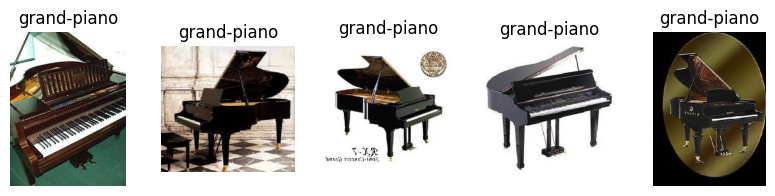

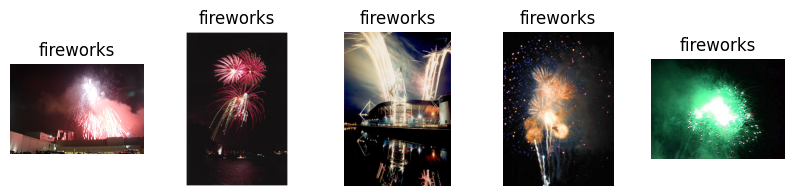

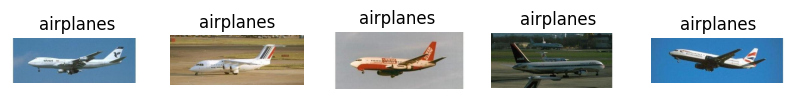

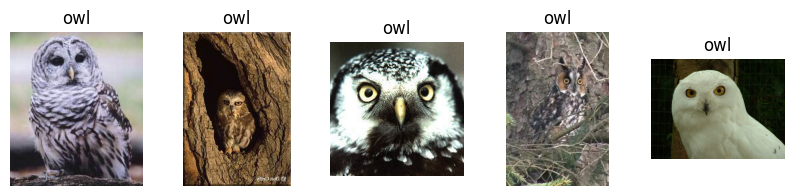

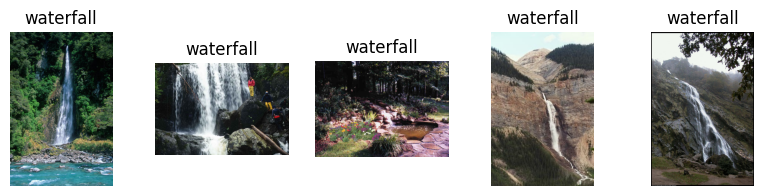

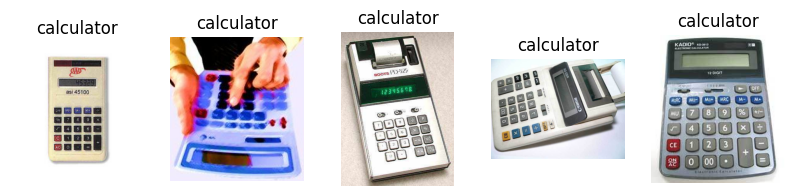

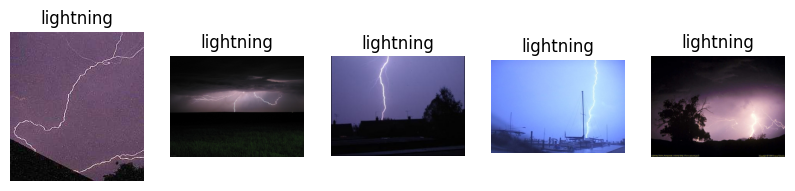

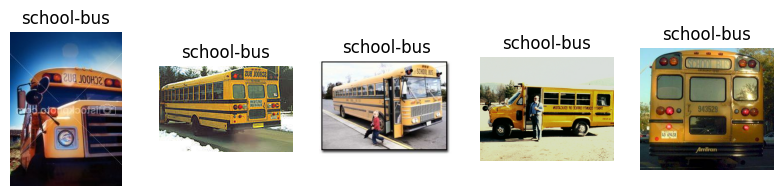

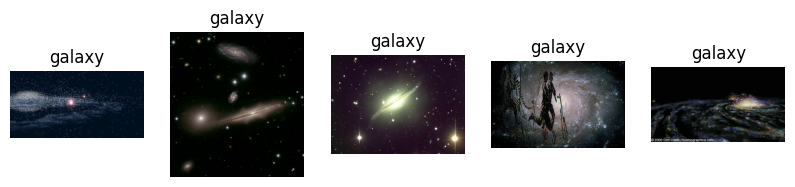

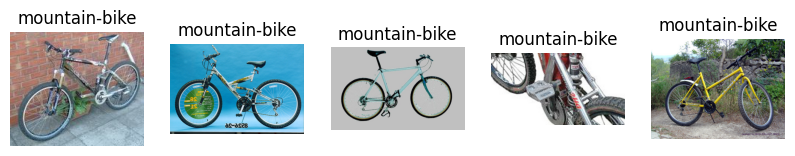

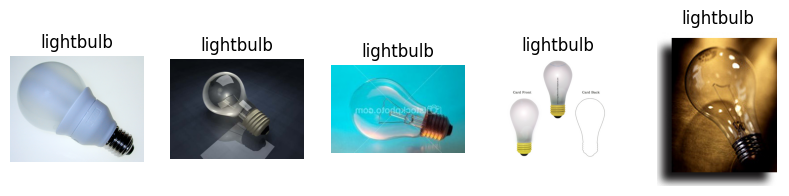

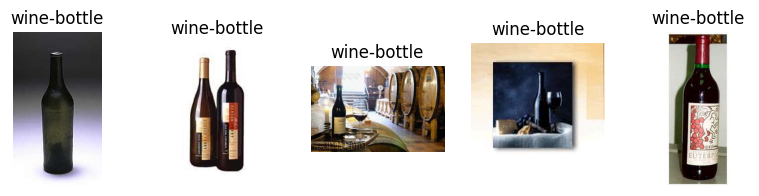

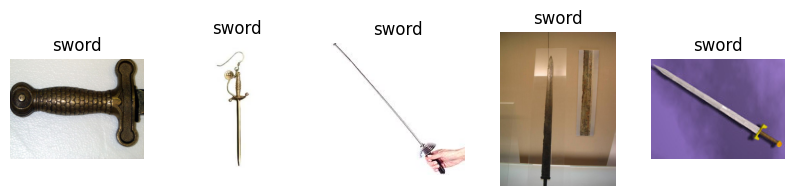

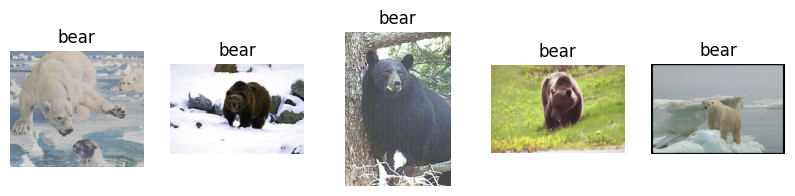

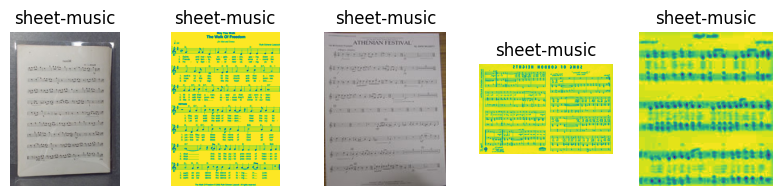

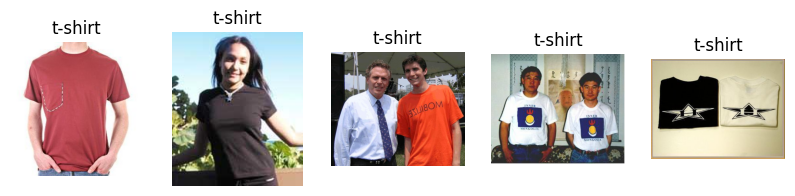

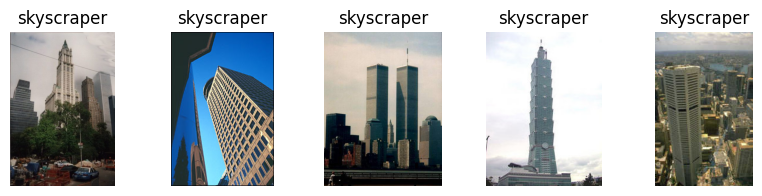

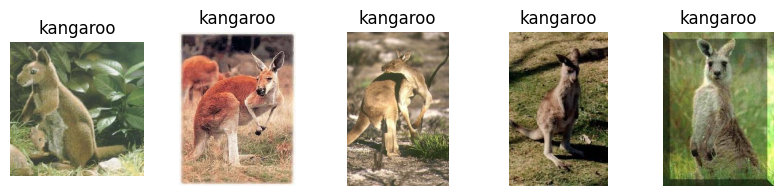

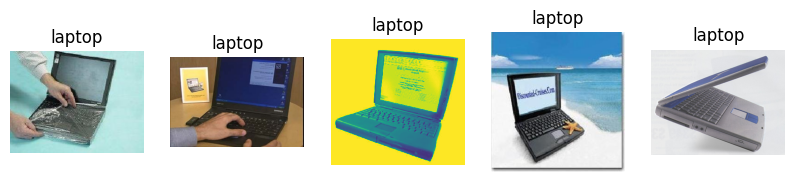

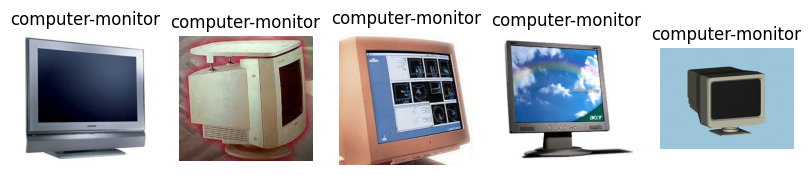

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Visualize some images from each class
for class_name in class_counts.keys():
    class_path = os.path.join(train_dir, class_name)
    sample_images = os.listdir(class_path)[:5]  # Get 5 sample images

    plt.figure(figsize=(10, 2))
    for i, img_name in enumerate(sample_images):
        img = mpimg.imread(os.path.join(class_path, img_name))
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()


In [1]:
!pip install --upgrade tensorflow keras


In [3]:
!pip uninstall -y keras tensorflow


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


In [4]:
!pip install tensorflow


  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,  # Adjust as needed
    class_mode='categorical'
)


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [26]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [27]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1554 images belonging to 20 classes.


In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Adjust batch size if needed
    epochs=10  # Adjust the number of epochs
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 413ms/step - accuracy: 0.0572 - loss: 1371.2771
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.0625 - loss: 353.9490
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.1016 - loss: 261.1671
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.1250 - loss: 98.1851
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.1537 - loss: 131.8593
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.1875 - loss: 102.2027
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.1501 - loss: 114.8869
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.1562 - loss: 133.1436
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.1297 - loss: 165.6410
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.1875 - loss: 189.6401


In [29]:
test_loss, test_accuracy = model.evaluate(test_images_array, test_labels_array)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.0585 - loss: 226.8335
Test Accuracy: 0.0500
Test Loss: 229.3869
